In [ ]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import nltk
nltk.download("stopwords");
from nltk.corpus import stopwords

nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, PorterStemmer

nltk.download('omw-1.4')

import matplotlib.pyplot as plt
%matplotlib inline

import string
import seaborn as sns
from plotly import graph_objs as go

from collections import defaultdict, Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [ ]:
train_data = pd.read_csv('train.csv')
train_data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [ ]:
train_data.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [ ]:
train_data['sentiment'].value_counts()

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [ ]:
train_data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [ ]:
train_data = train_data.dropna()
train_data.isnull().sum().sum()

0

In [ ]:
# Adding interesting variables for analysis
train_data['length'] = train_data['text'].apply(lambda x:len(str(x)))
train_data['word_counts'] = train_data['text'].apply(lambda x:len(str(x).split()))
train_data['Unique_words']=train_data['text'].apply(lambda x: len(set(str(x).split())))#unique word count
train_data['stop_words_count']=train_data['text'].apply(lambda x:len([w for w in str(x).lower().split() if w in STOPWORDS]))
train_data['mean_word_length']=train_data['text'].apply(lambda x:np.mean([len(w) for w in str(x).lower().split()]))
#Punctuations
train_data['Punctuation_count']=train_data['text'].apply(lambda x:len([w for w in str(x) if w in string.punctuation]))


train_data['word_counts_ST'] = train_data['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train_data['difference_in_words'] = train_data['word_counts'] - train_data['word_counts_ST'] #Difference in Number of words text and Selected Text

neutral = train_data[train_data['sentiment'] == 'neutral']
positive = train_data[train_data['sentiment'] == 'positive']
negative = train_data[train_data['sentiment'] == 'negative']

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,36,7,7,4,4.142857,2,7,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,46,10,10,4,3.600000,3,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,25,5,5,2,4.200000,3,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,5,5,2,5.200000,1,3,2
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,14,14,7,4.357143,6,3,11


In [ ]:
train_data['text'] = train_data['text'].str.lower()
train_data.head()

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
0,cb774db0d1,"i`d have responded, if i were going","I`d have responded, if I were going",neutral,36,7,7,4,4.142857,2,7,0
1,549e992a42,sooo sad i will miss you here in san diego!!!,Sooo SAD,negative,46,10,10,4,3.600000,3,2,8
2,088c60f138,my boss is bullying me...,bullying me,negative,25,5,5,2,4.200000,3,2,3
3,9642c003ef,what interview! leave me alone,leave me alone,negative,31,5,5,2,5.200000,1,3,2
4,358bd9e861,"sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,75,14,14,7,4.357143,6,3,11


In [ ]:
colors=['blue','red','green']
sent=train_data.sentiment.unique()

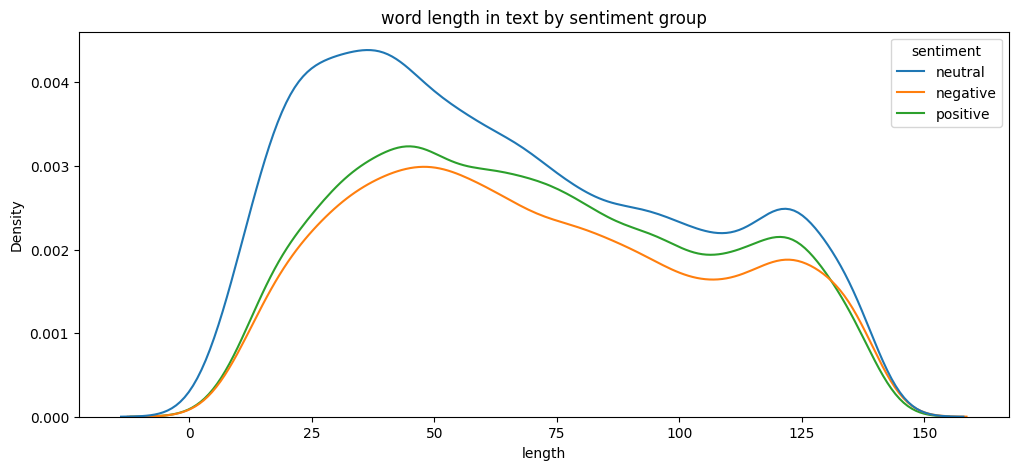

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train_data.length,hue=train_data.sentiment)
plt.title('word length in text by sentiment group')
plt.show()

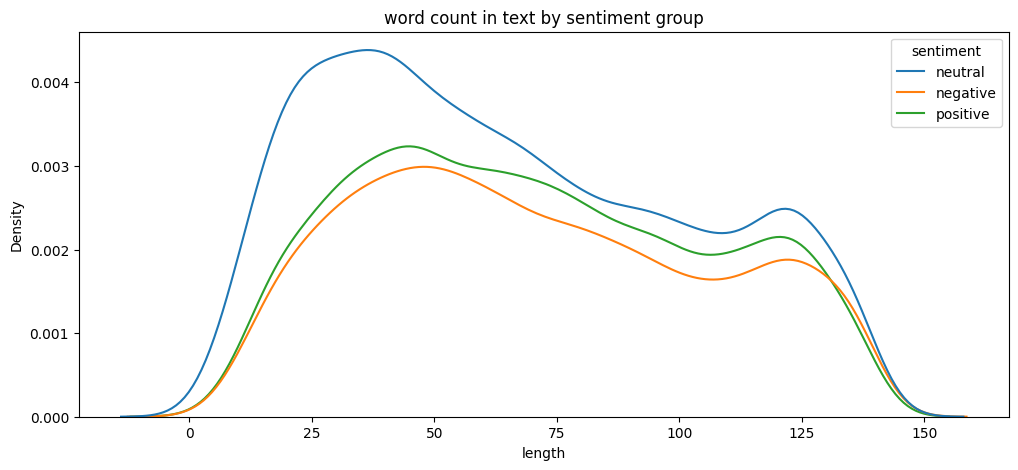

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train_data.length,hue=train_data.sentiment)
plt.title('word count in text by sentiment group')
plt.show()

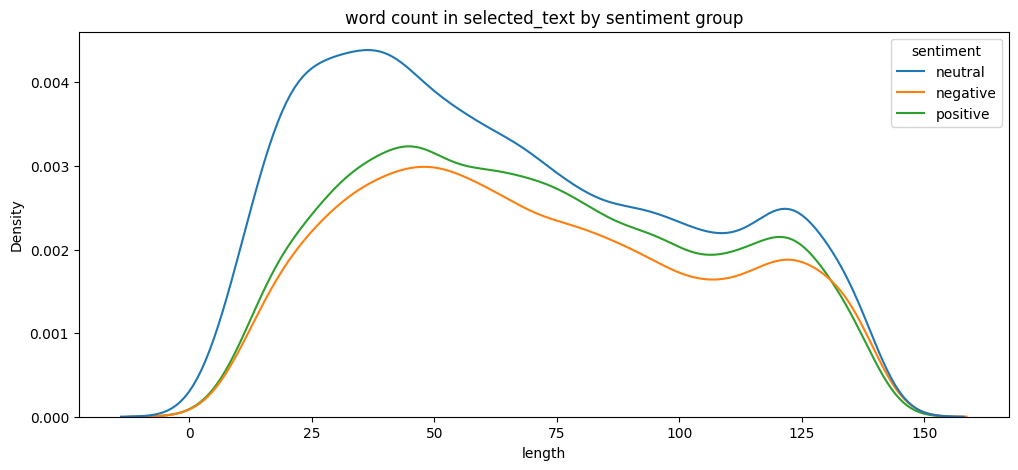

In [ ]:
plt.figure(figsize=(12,5))
sns.kdeplot(x=train_data.length,hue=train_data.sentiment)
plt.title('word count in selected_text by sentiment group')
plt.show()

In [ ]:
x1 = neutral.length.values
x2 = positive.length.values
x3 = negative.length.values

fig = go.Figure(data=[go.Histogram(x=x1,
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5, 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of neutral tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x2,
                                   marker_line_width=1, 
                                   marker_color='rgb(50,202,50)', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of positive tweet lengths')
fig.show()

fig = go.Figure(data=[go.Histogram(x=x3,
                                   marker_line_width=1, 
                                   marker_color='crimson', 
                                   xbins_size = 5, 
                                   marker_line_color="midnightblue", 
                                   opacity = 0.5)])

fig.update_layout(title_text='Distribution of negative tweet lengths')
fig.show()

It can also be seen on these plots that the minimum tweets length value is close to zero. Let's take a closer look at these tweets.



In [ ]:
short_tweet_index=[index for index,tweet in enumerate(train_data['text']) if len(str(tweet))<=5]
train_data.iloc[short_tweet_index,:]

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
238,e98226e842,thx,Thx,neutral,4,1,1,0,3.0,0,1,0
641,5210cc55ae,no,no,neutral,3,1,1,1,2.0,0,1,0
735,a1bda541fd,yep,yep,neutral,4,1,1,0,3.0,0,1,0
1308,823122597e,mean,mean,neutral,5,1,1,0,4.0,0,1,0
1668,a2f9a26b7d,aww,aww,neutral,4,1,1,0,3.0,0,1,0
3447,06a28a5f3e,why?,Why?,neutral,5,1,1,0,4.0,1,1,0
3675,f18b9435c8,with,with,neutral,5,1,1,1,4.0,0,1,0
5790,8560ce3f2e,hey,Hey,neutral,4,1,1,0,3.0,0,1,0
6596,1cfb46972e,good,good,positive,5,1,1,0,4.0,0,1,0
6746,8f8fe5e150,yep.,Yep.,neutral,5,1,1,0,4.0,1,1,0


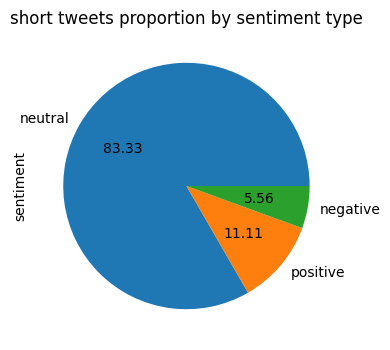

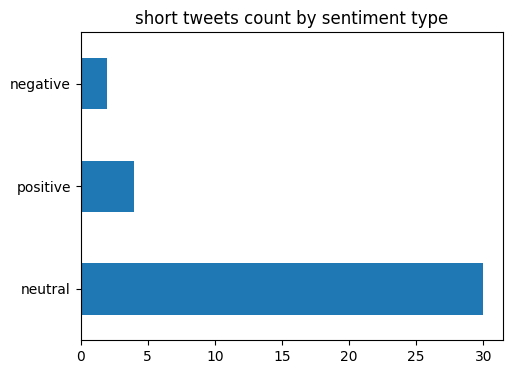

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
train_data.iloc[short_tweet_index,:]['sentiment'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('short tweets proportion by sentiment type')


plt.figure(figsize=(12,4))
plt.subplot(1, 2, 2)
train_data.iloc[short_tweet_index,:]['sentiment'].value_counts().plot(kind='barh')
plt.title('short tweets count by sentiment type')
plt.show()

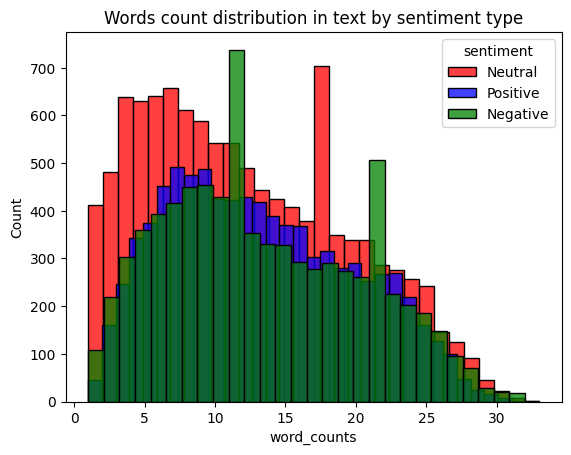

In [ ]:
sns.histplot(x='word_counts',data=neutral,color='red',legend=False)
sns.histplot(x='word_counts',data=positive,color='blue',legend=False)
sns.histplot(x='word_counts',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Words count distribution in text by sentiment type')
plt.show()

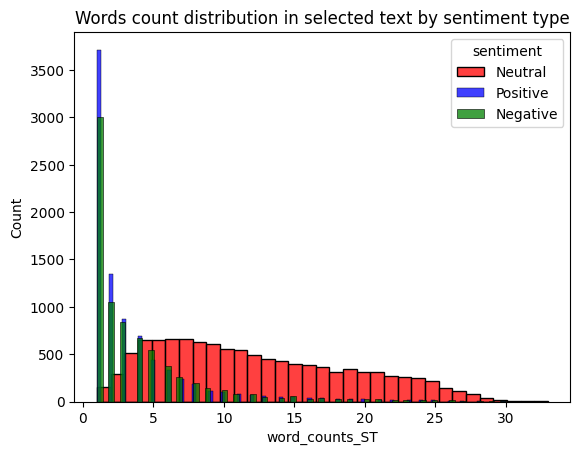

In [ ]:
sns.histplot(x='word_counts_ST',data=neutral,color='red',legend=False)
sns.histplot(x='word_counts_ST',data=positive,color='blue',legend=False)
sns.histplot(x='word_counts_ST',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Words count distribution in selected text by sentiment type')
plt.show()

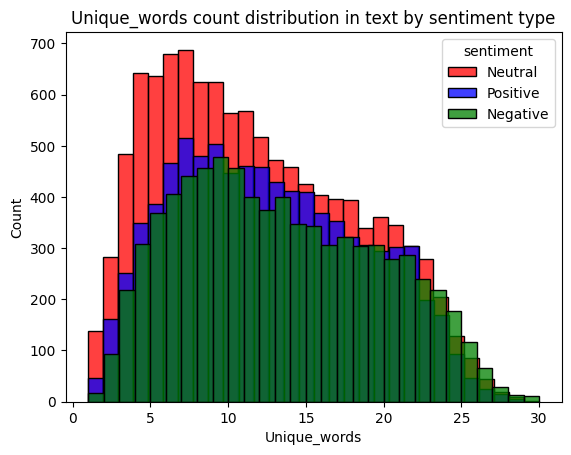

In [ ]:
sns.histplot(x='Unique_words',data=neutral,color='red',legend=False)
sns.histplot(x='Unique_words',data=positive,color='blue',legend=False)
sns.histplot(x='Unique_words',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Unique_words count distribution in text by sentiment type')
plt.show()

## Stop words removal

In [ ]:
stop_words = stopwords.words('english')
print(stop_words[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
train_data["text"] = train_data['text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words)) 

In [ ]:
train_data.head()

,textID,text,selected_text,sentiment,length,word_counts,Unique_words,stop_words_count,mean_word_length,Punctuation_count,word_counts_ST,difference_in_words
0,cb774db0d1,"i`d responded, going","I`d have responded, if I were going",neutral,36,7,7,4,4.142857,2,7,0
1,549e992a42,sooo sad miss san diego!!!,Sooo SAD,negative,46,10,10,4,3.600000,3,2,8
2,088c60f138,boss bullying me...,bullying me,negative,25,5,5,2,4.200000,3,2,3
3,9642c003ef,interview! leave alone,leave me alone,negative,31,5,5,2,5.200000,1,3,2
4,358bd9e861,"sons ****, couldn`t put releases already bought","Sons of ****,",negative,75,14,14,7,4.357143,6,3,11


## Removing links from the text

In [ ]:
train_data['text'].iloc[5]

'http://www.dothebouncy.com/smf - shameless plugging best rangers forum earth'

In [ ]:
train_data["text"] = train_data["text"].apply(lambda x: re.sub(r"http\S+", "", x))

In [ ]:
train_data["text"] = train_data["text"].apply(lambda x: re.sub(r"www\.\S+", "", x))

In [ ]:
train_data['text'].iloc[5]

' - shameless plugging best rangers forum earth'

## Removing emails from text

In [ ]:
emails =train_data['text'].apply(lambda x: re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", x))
emails[:5]

0    []
1    []
2    []
3    []
4    []
Name: text, dtype: object

In [ ]:
train_data['text'] = train_data['text'].astype(str)
train_data['text']=train_data['text'].apply(lambda x: re.sub(r'\w+@\w+\.com',' ',x))

## Removing numbers from text

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'\d', "", x))

## Removing Punctuations

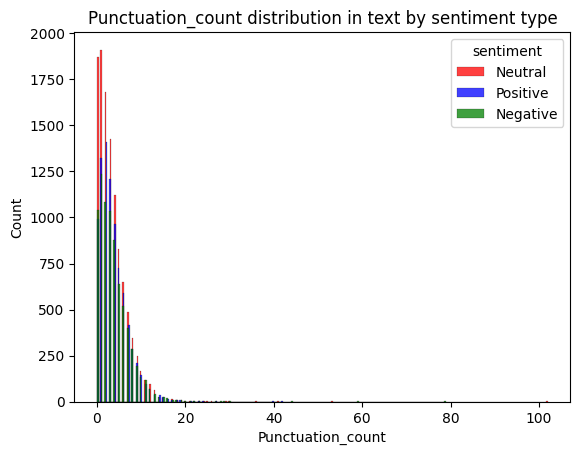

In [ ]:
sns.histplot(x='Punctuation_count',data=neutral,color='red',legend=False)
sns.histplot(x='Punctuation_count',data=positive,color='blue',legend=False)
sns.histplot(x='Punctuation_count',data=negative,color='green',legend=False)
plt.legend(title='sentiment', loc='upper right', labels=['Neutral', 'Positive','Negative'])
plt.title('Punctuation_count distribution in text by sentiment type')
plt.show()

Text(0.5, 0.98, 'Punctuations in tweets')

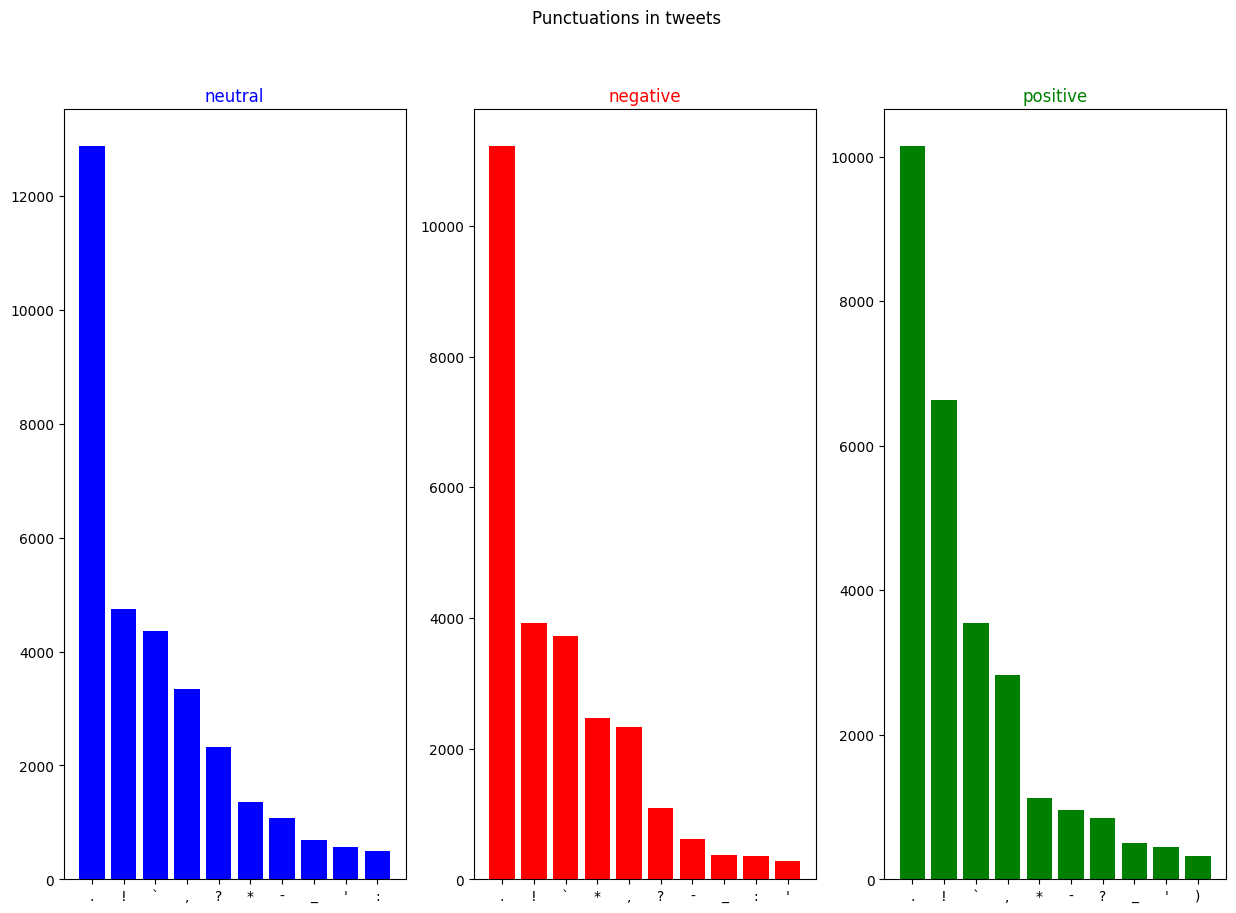

In [ ]:
train_data['punc']=train_data['text'].apply(lambda x : [c for c in x if c in string.punctuation])
fig,ax=plt.subplots(1,3,figsize=(15,10))
for i in range(3):
    new=train_data[train_data['sentiment']==sent[i]]['punc']
    punc=[p for pun in new.values for p in pun]
    counter=Counter(punc).most_common(10)
    x,y=zip(*counter)
    ax[i].bar(x,y,color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
    
fig.suptitle("Punctuations in tweets")

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: re.sub(r'[./\+=*<>?*&$#@!:_,-;]', '', x))

In [ ]:
train_data['text'].head(10)

0                               i`d responded going
1                           sooo sad miss san diego
2                                  boss bullying me
3                             interview leave alone
4        sons  couldn`t put releases already bought
5       shameless plugging best rangers forum earth
6                  am feedings baby fun smiles coos
7                                        soooo high
8                                                  
9    journey wow u became cooler hehe (is possible)
Name: text, dtype: object

## Lemmitization

In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
train_data['text'] = train_data['text'].apply(lambda x: " ".join(wnl.lemmatize(word, "v") for word in x.split()))

In [ ]:
train_data['text'].head(10)

0                                    i`d respond go
1                           sooo sad miss san diego
2                                     boss bully me
3                             interview leave alone
4             sons couldn`t put release already buy
5           shameless plug best rangers forum earth
6                        be feed baby fun smile coo
7                                        soooo high
8                                                  
9    journey wow u become cooler hehe (is possible)
Name: text, dtype: object

## Counting frequency of words after lemmitization

In [ ]:
word_frequency = train_data['text'].str.split(expand=True).stack().value_counts().reset_index()[:20]
 
word_frequency.columns = ['Word', 'Frequency'] 
 
word_frequency

,Word,Frequency
0,get,3003
1,go,2822
2,i`m,2181
3,day,2078
4,good,1539
5,work,1476
6,like,1435
7,love,1336
8,it`s,1180
9,today,1088


## Word clouds in text

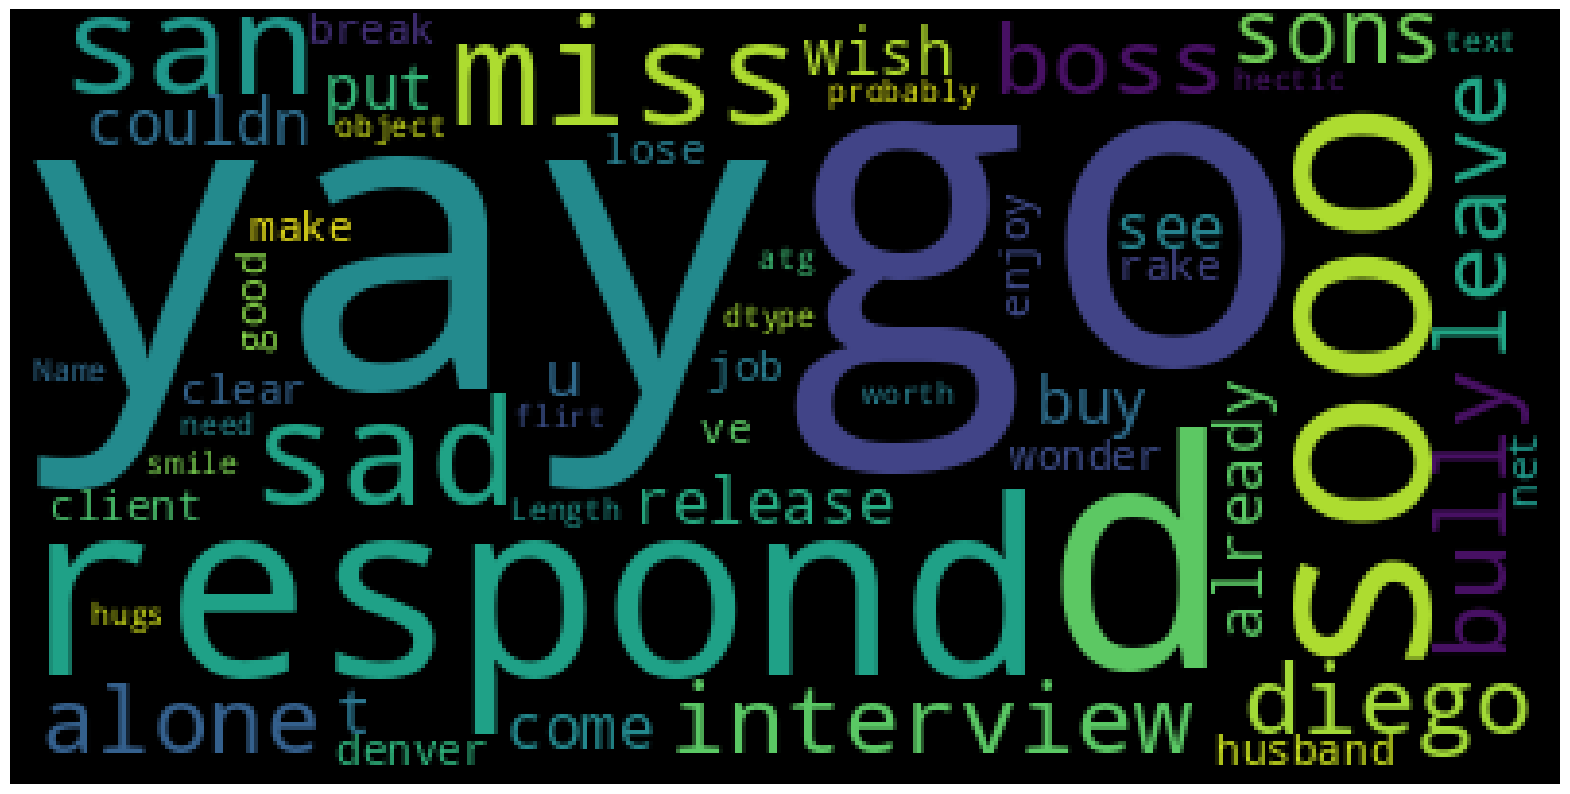

In [ ]:
def word_cloud (data):
    wordcloud = WordCloud().generate(str(data))
        
    fig = plt.figure(1, figsize = (20, 20))
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()
    
word_cloud(train_data["text"])

In [ ]:
stopwords=set(STOPWORDS)
def word_cloud(data,title=None,ax=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=100,
    max_font_size=30,
    scale=3,
    random_state=42)
    wordcloud=wordcloud.generate(str(data))
    ax.imshow(wordcloud,interpolation='nearest')
    ax.axis('off')

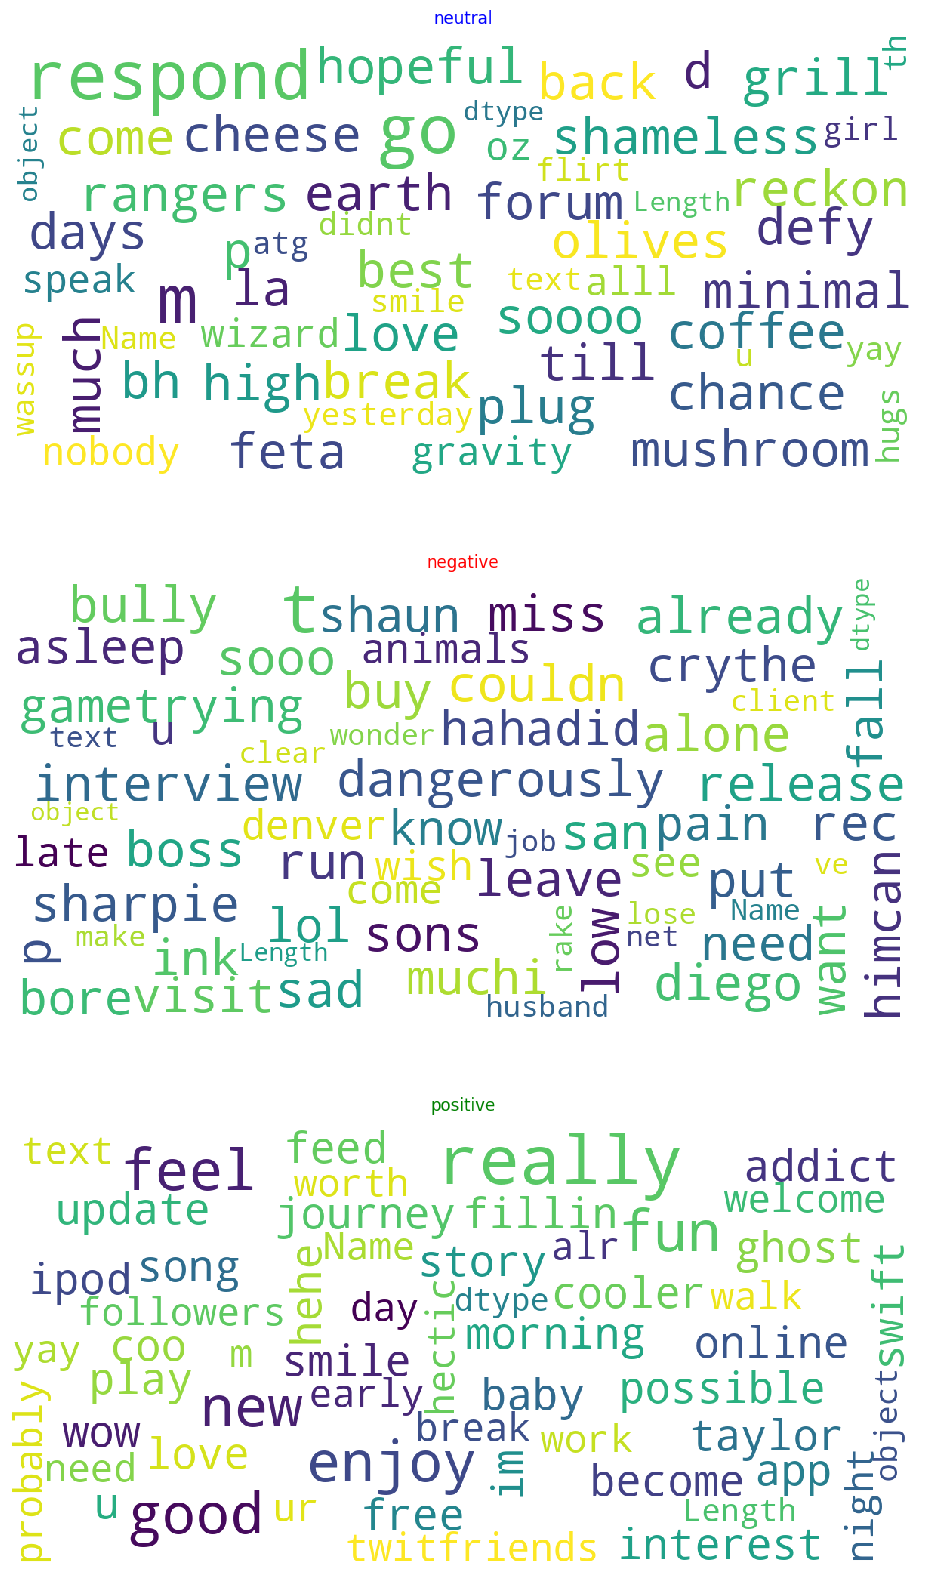

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
for i in range(3):
    new=train_data[train_data['sentiment']==sent[i]]['text']
    word_cloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])

## Word clouds in selected text

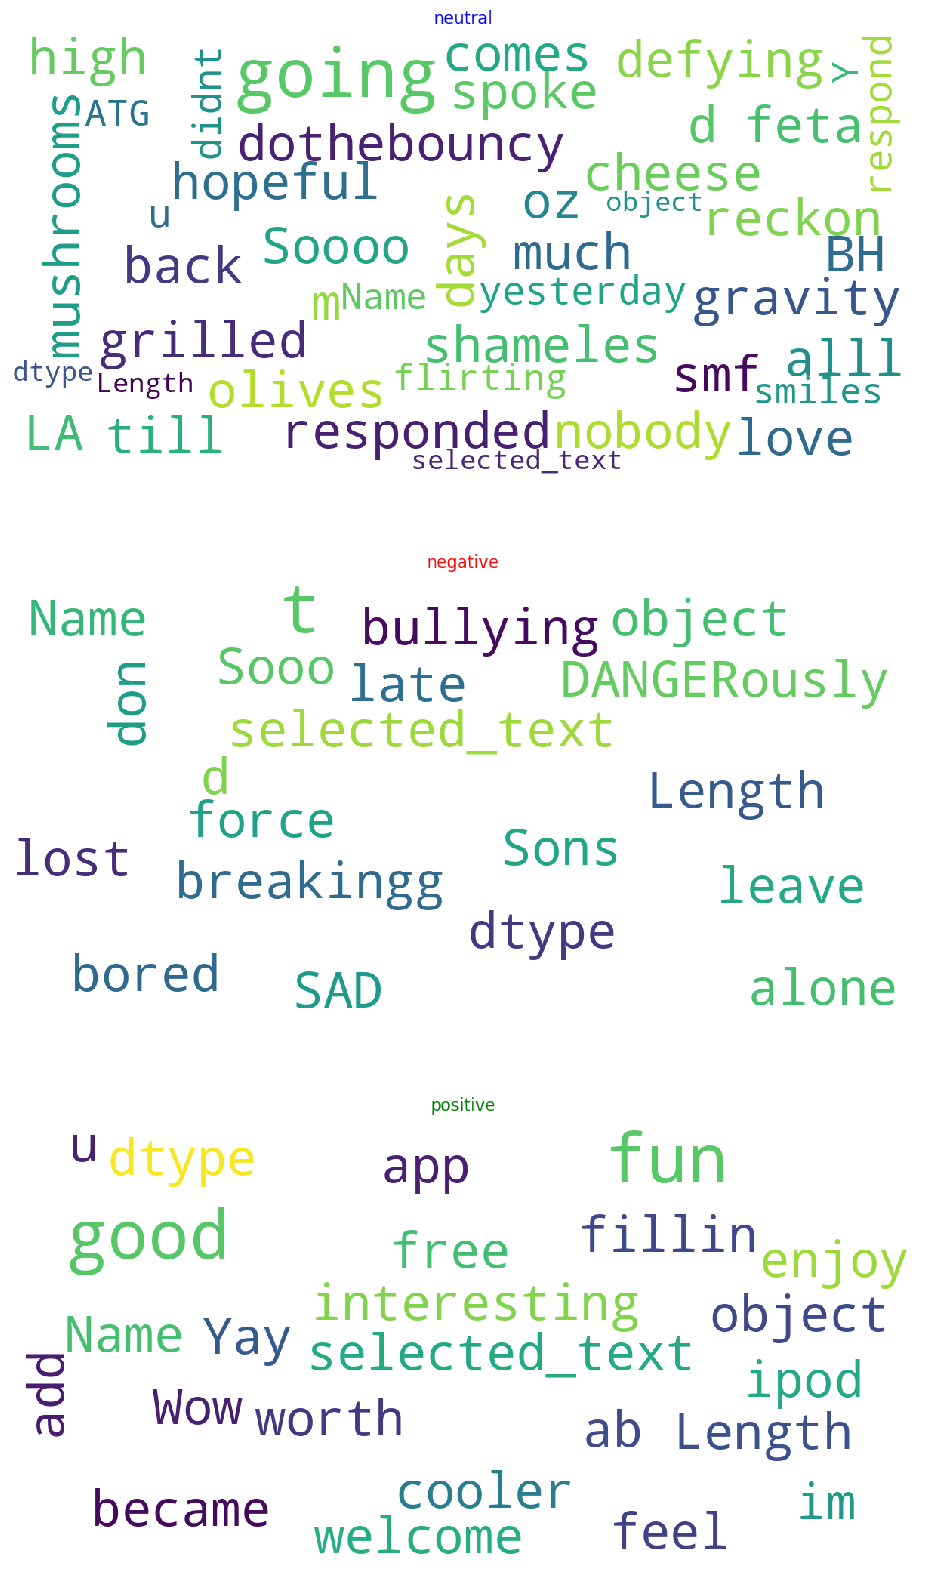

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(25,20))
for i in range(3):
    new=train_data[train_data['sentiment']==sent[i]]['selected_text'].dropna()
    word_cloud(new,ax=ax[i])
    ax[i].set_title(sent[i],color=colors[i])

## Combining all preprocessing

In [ ]:
stop=stop_words
def preprocess_news(df,stop=stop,n=1,col='text'):
    '''Function to preprocess and create corpus'''
    new_corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for text in df[col]:
        words=[w for w in word_tokenize(text) if (w not in stop)]
       
        words=[lem.lemmatize(w) for w in words if(len(w)>n)]
     
        new_corpus.append(words)
        
    new_corpus=[word for l in new_corpus for word in l]
    return new_corpus

## Cleaning the dataset

In [ ]:
def cleaning(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
def clean(df):
    for col in ['text','selected_text']:
        df[col]=df[col].astype(str).apply(lambda x:cleaning(x))
    return df

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train=clean(df_train)

## Most Common tweet words

Text(0.5, 0.98, 'Common words in tweet text')

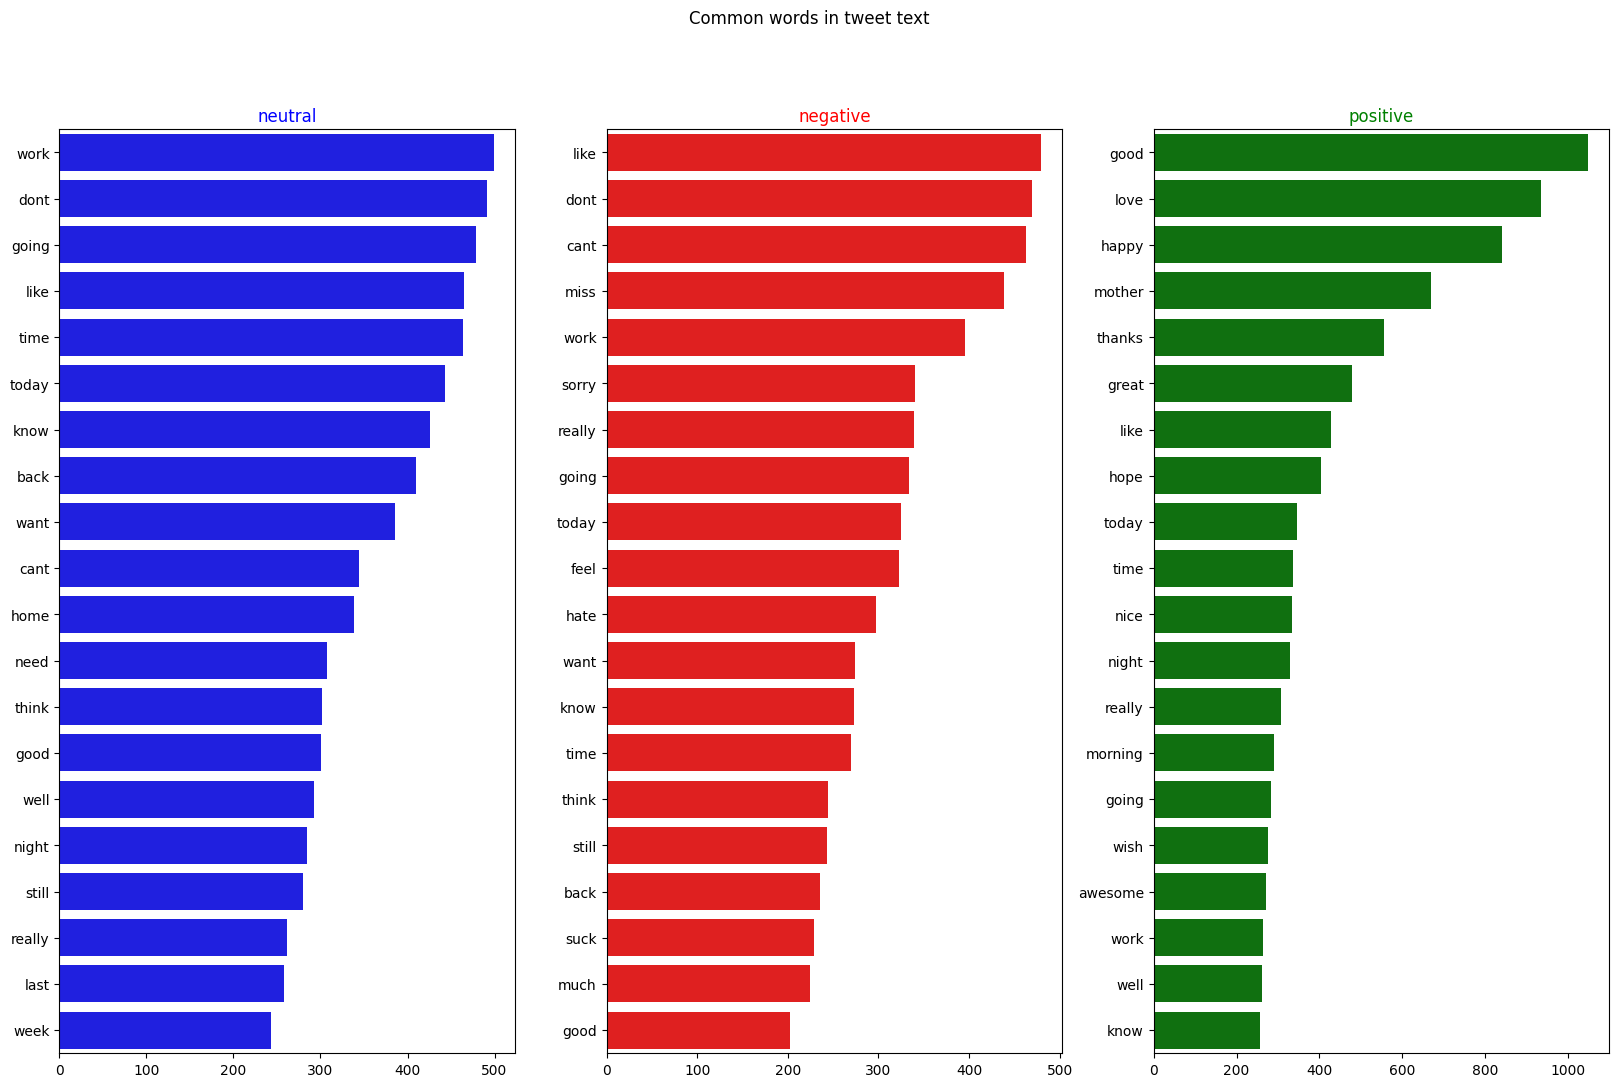

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    new=df_train[df_train['sentiment']==sent[i]]
    corpus_train=preprocess_news(new,n=3)
    counter=Counter(corpus_train)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Common words in tweet text")

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

Text(0.5, 0.98, 'Common bigrams in selected text')

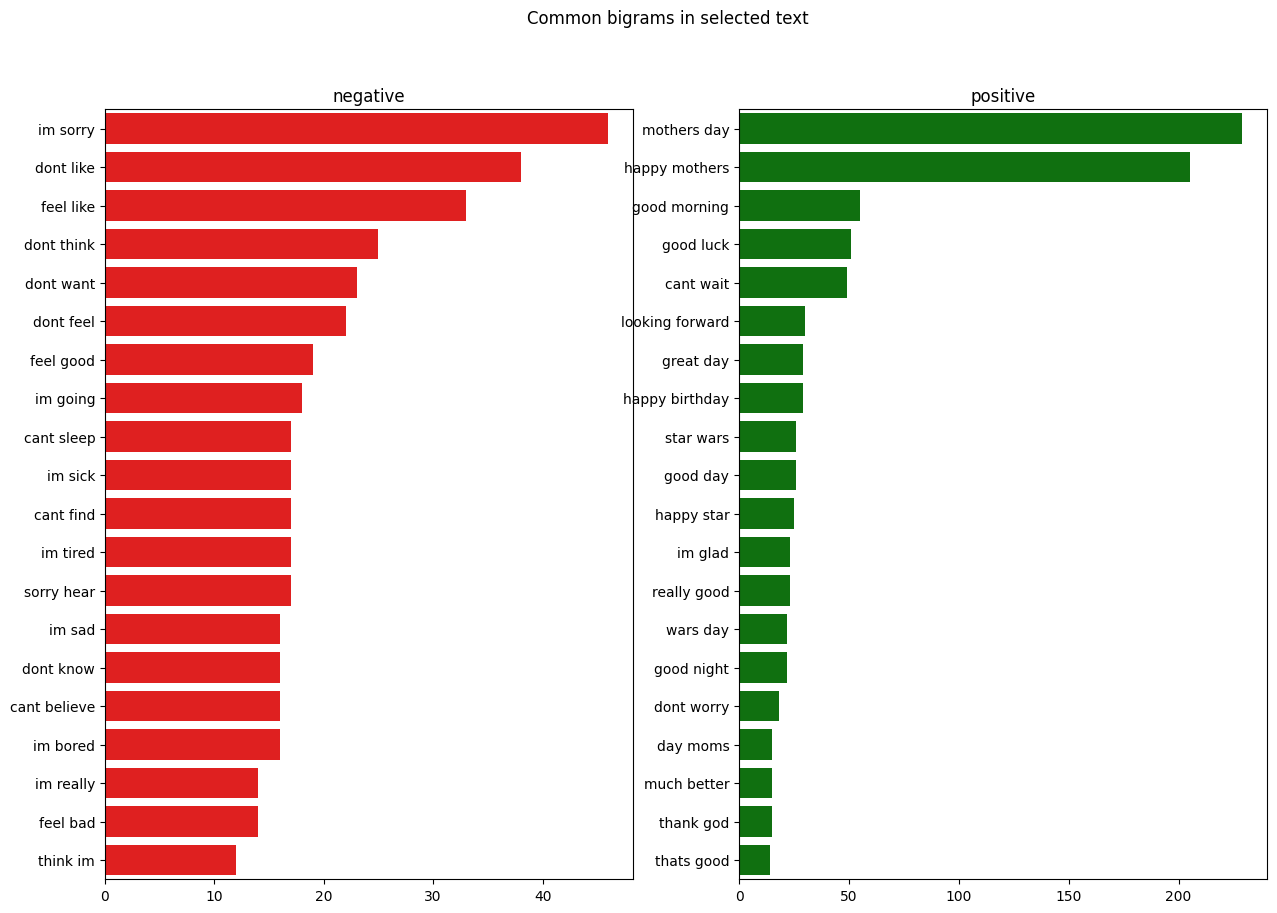

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    new=df_train[df_train['sentiment']==sent[i+1]]['selected_text']
    top_n_bigrams=get_top_ngram(new,2)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i+1])
    ax[i].set_title(sent[i+1])
    
fig.suptitle("Common bigrams in selected text")

Text(0.5, 0.98, 'Common bigrams in selected text')

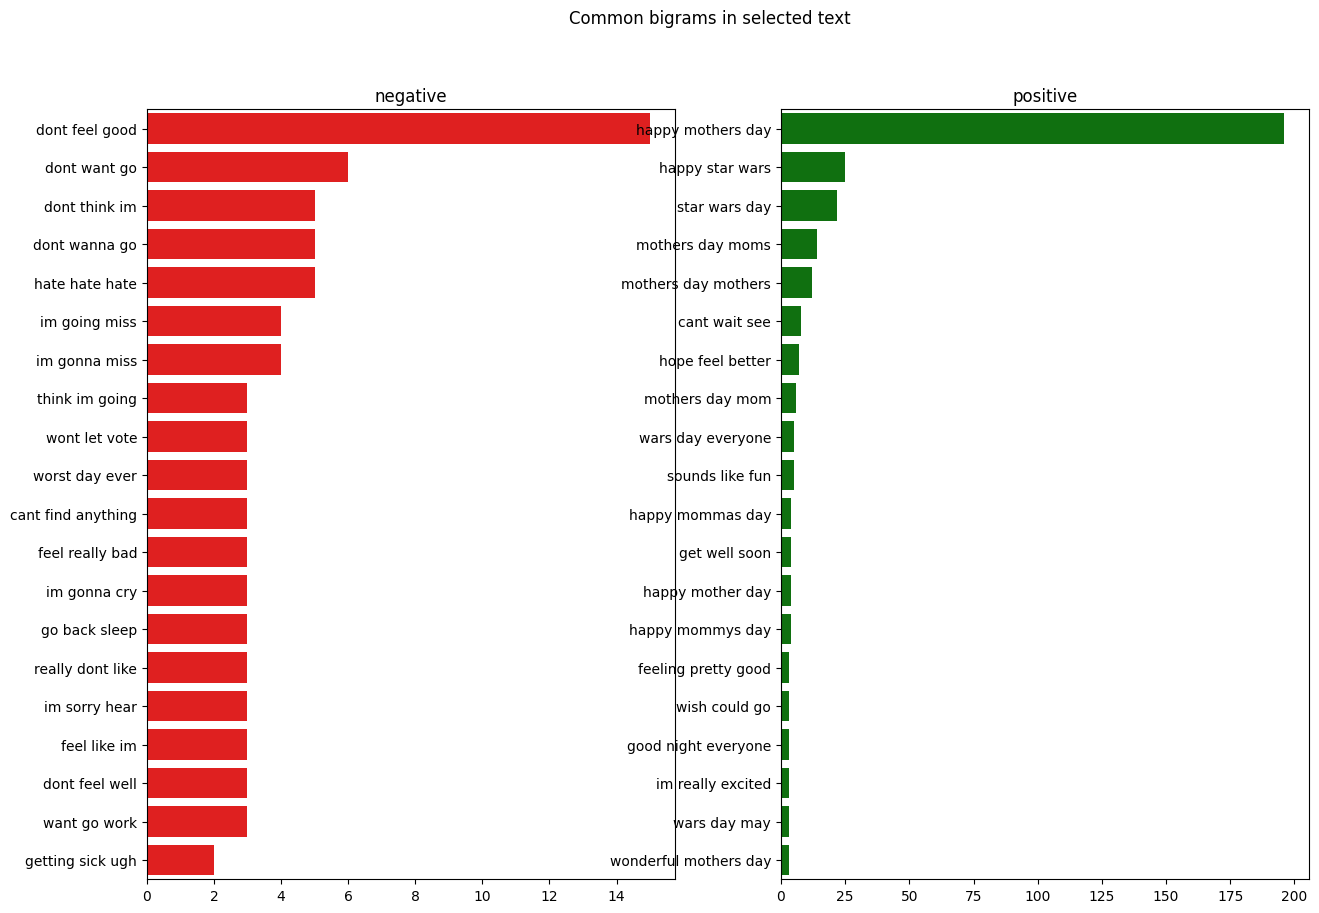

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    new=df_train[df_train['sentiment']==sent[i+1]]['selected_text']
    top_n_bigrams=get_top_ngram(new,3)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i+1])
    ax[i].set_title(sent[i+1])
    
fig.suptitle("Common bigrams in selected text")

In [ ]:
df_train["text"] = df_train["text"].apply(lambda x: word_tokenize(x))

In [ ]:
df_test["text"] = df_test["text"].apply(lambda x: word_tokenize(x))

In [ ]:
X = df_train["text"]

In [ ]:
df_train["text"]

0                [id, have, responded, if, i, were, going]
1        [sooo, sad, i, will, miss, you, here, in, san,...
2                             [my, boss, is, bullying, me]
3                      [what, interview, leave, me, alone]
4        [sons, of, why, couldnt, they, put, them, on, ...
                               ...                        
27476    [wish, we, could, come, see, u, on, denver, hu...
27477    [ive, wondered, about, rake, to, the, client, ...
27478    [yay, good, for, both, of, you, enjoy, the, br...
27479                            [but, it, was, worth, it]
27480    [all, this, flirting, going, on, the, atg, smi...
Name: text, Length: 27481, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df_train['sentiment'])

In [ ]:
X_test = df_test["text"]
y_test = le.fit_transform(df_test['sentiment'])

In [ ]:
Y.shape

(27481,)

In [ ]:
print(X_test.shape)
print(y_test.shape)

(3534,)
(3534,)


In [ ]:
y = pd.get_dummies(df_train['sentiment'])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_train.shape)
print(y_test.shape)

(5497,)
(3534,)
(5497, 3)
(21984, 3)
(3534,)


In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform validation data
X_val = count_vector.fit_transform(X_val).toarray()

# Transform testing data
X_test = count_vector.fit_transform(X_test).toarray()

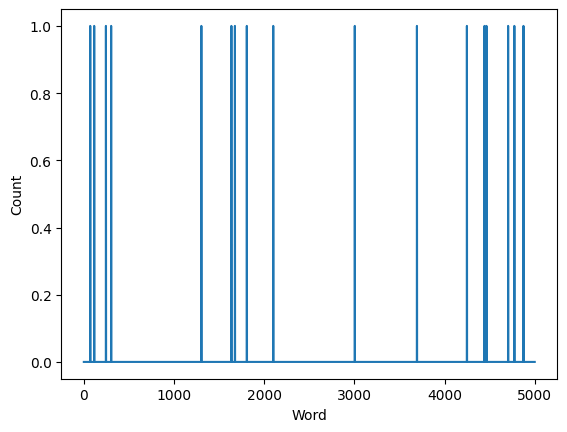

In [ ]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 50
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer


X, tokenizer = tokenize_pad_sequences(df_train["text"])
print('After Tokenization & Padding \n', X[0])

After Tokenization & Padding 
 [16  1 46  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]


In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)

Train Set -> (21984, 5000) (21984, 3)
Validation Set -> (5497, 5000) (5497, 3)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 50
embedding_size = 32
epochs=10
learning_rate = 0.1
# model initialization

model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_size, input_length=X_train.shape[1]),
    keras.layers.Bidirectional(keras.layers.LSTM(8)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=learning_rate)
print(model.summary())

# Compile model
model.compile(optimizer= opt, loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 128
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 32)          1600      
                                                                 
 bidirectional (Bidirectiona  (None, 16)               2624      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 3)                 75        
                                                                 
Total params: 4,707
Trainable params: 4,707
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
172/172 [==============================] - 54s 251ms/step - loss: 1.0950 - accuracy: 0.4005 - precision:

Models- LSTM

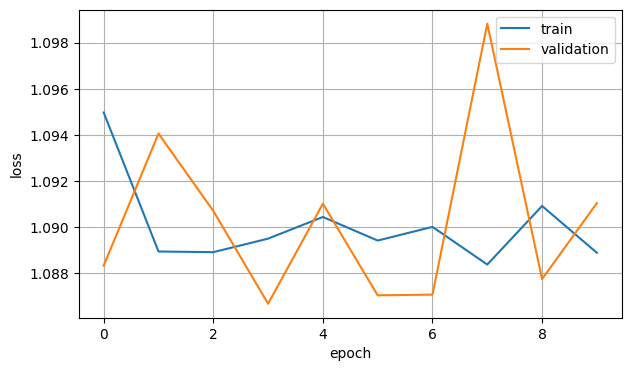

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

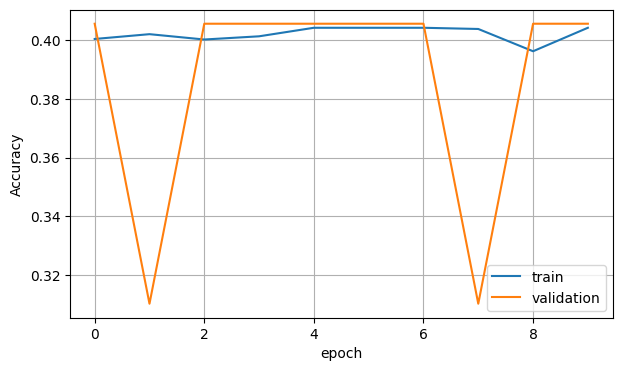

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

In [ ]:
model.save('LSTM_updated.h5')

In [ ]:
from tensorflow import keras
model1 = keras.models.load_model('LSTM_updated.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate predictions on the test data
y_pred = model1.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

111/111 [==============================] - 11s 96ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.40      1.00      0.58      1430
           2       0.00      0.00      0.00      1103

    accuracy                           0.40      3534
   macro avg       0.13      0.33      0.19      3534
weighted avg       0.16      0.40      0.23      3534

[[   0 1001    0]
 [   0 1430    0]
 [   0 1103    0]]


Hyperparameter Tuning:


*   Learning Rate: 0.01
*   Number of neuron in hidden layer: 32


*   Batch Size:64








In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 50
embedding_size = 32
epochs=10
learning_rate = 0.01
# model initialization

model1 = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_size, input_length=X_train.shape[1]),
    keras.layers.Bidirectional(keras.layers.LSTM(8)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=learning_rate)
print(model1.summary())

# Compile model
model1.compile(optimizer= opt, loss='categorical_crossentropy',
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 64
history1 = model1.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 32)          1600      
                                                                 
 bidirectional (Bidirectiona  (None, 16)               2624      
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,867
Trainable params: 4,867
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
344/344 [==============================] - 89s 228ms/step - loss: 1.0875 - accuracy: 0.4025 - precision:

In [ ]:
print(model1.summary())

NameError: ignored

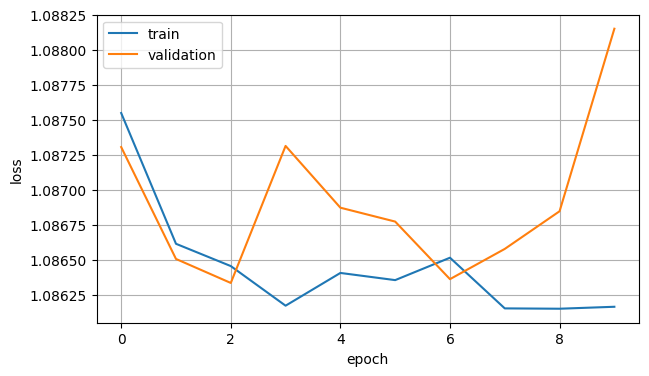

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

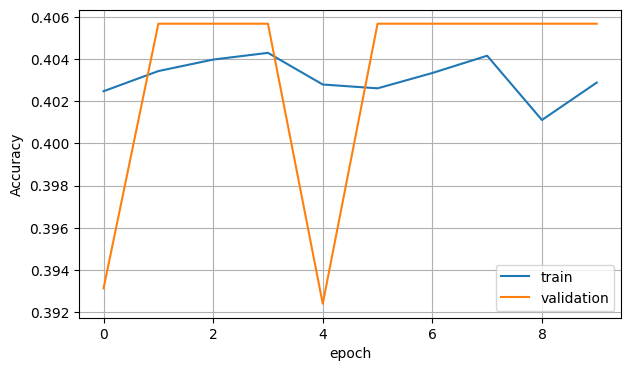

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
plt.show()

In [ ]:
model1.save('LSTM_updated_1.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate predictions on the test data
y_pred = model1.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Print the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

111/111 [==============================] - 12s 97ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1001
           1       0.41      1.00      0.58      1430
           2       0.43      0.01      0.02      1103

    accuracy                           0.41      3534
   macro avg       0.28      0.33      0.20      3534
weighted avg       0.30      0.41      0.24      3534

[[   0  995    6]
 [   0 1424    6]
 [   0 1094    9]]
